In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DoctorVisits-DA.csv")

In [3]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [4]:
df.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


In [5]:
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [6]:
df.shape

(5190, 13)

In [7]:
print("No. of rows: ", df.shape[0])

No. of rows:  5190


In [8]:
print("No. of columns: ", df.shape[1])

No. of columns:  13


In [9]:
df.dtypes

,0
Unnamed: 0,int64
visits,int64
gender,object
age,float64
income,float64
illness,int64
reduced,int64
health,int64
private,object
freepoor,object


# Null Report

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
visits,0
gender,0
age,0
income,0
illness,0
reduced,0
health,0
private,0
freepoor,0


In [11]:
df[df['private'].isnull()]

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic


In [12]:
df[df['lchronic'].isnull()]

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic


# No Null Values

In [13]:
df1 = df.drop_duplicates()

In [14]:
df1.shape

(5190, 13)

In [15]:
df.shape

(5190, 13)

# No Null Values

In [16]:
df1.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [17]:
df1.dtypes

,0
Unnamed: 0,int64
visits,int64
gender,object
age,float64
income,float64
illness,int64
reduced,int64
health,int64
private,object
freepoor,object


# Outliers Treatment

In [18]:
df1.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

<Axes: ylabel='visits'>

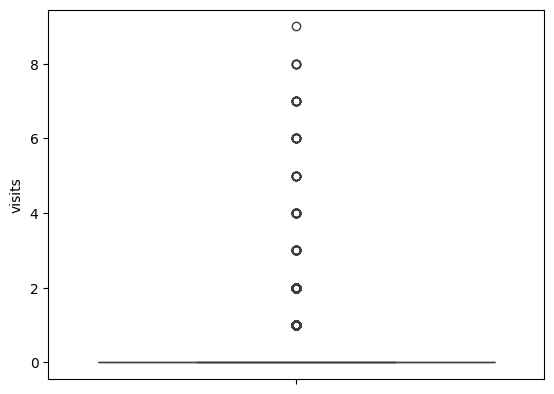

In [19]:
sns.boxplot(y = 'visits', data = df1)

<Axes: ylabel='age'>

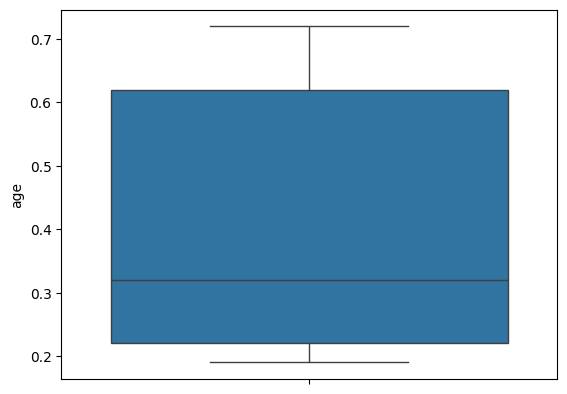

In [20]:
sns.boxplot(y = 'age', data = df1)

<Axes: ylabel='age'>

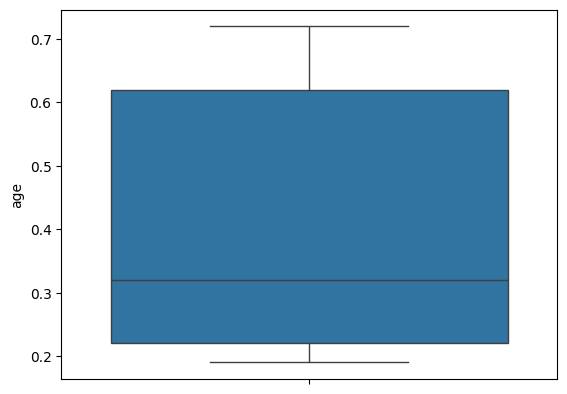

In [21]:
sns.boxplot(y = 'age', data = df1)

# Removal of Outliers

In [22]:
def remove_outliers(col_name):
  sorted(col_name)
  Q1, Q3 = col_name.quantiles([0.25, 0.75])
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  return lower, upper

# Analysis / Visualization

In [23]:
df1['gender'].value_counts()

,count
gender,
female,2702
male,2488


In [24]:
df1['illness'].value_counts()

,count
illness,
1,1638
0,1554
2,946
3,542
4,274
5,236


In [25]:
df1['private'].value_counts()

,count
private,
no,2892
yes,2298


In [26]:
df1['age'].value_counts()

,count
age,
0.22,1213
0.72,822
0.19,752
0.27,523
0.62,316
0.67,315
0.32,301
0.57,273
0.52,222


(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

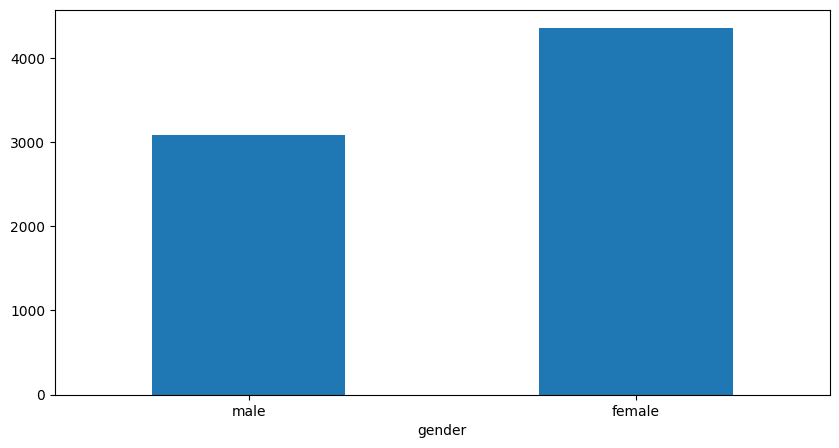

In [27]:
plt.figure(figsize = (10, 5))
df1.groupby(['gender'])['illness'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.xticks(rotation = 0 )

In [28]:
df1['age'].value_counts().sort_values(ascending = True)

,count
age,
0.42,126
0.37,146
0.47,181
0.52,222
0.57,273
0.32,301
0.67,315
0.62,316
0.27,523


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '5'),
  Text(1, 0, '4'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '0'),
  Text(5, 0, '1')])

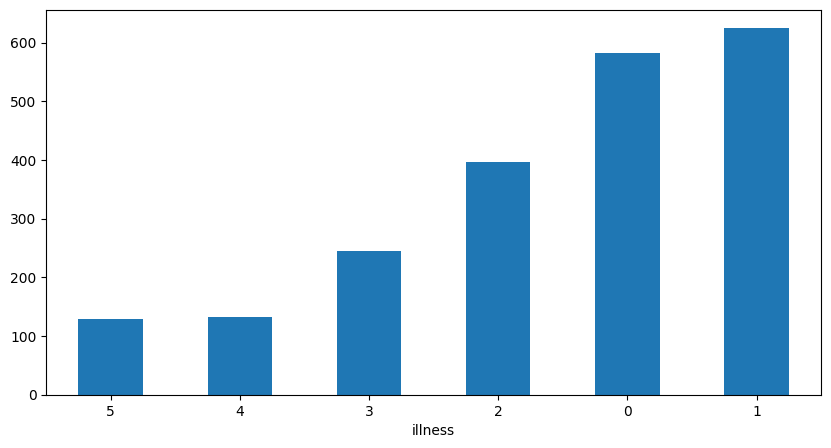

In [29]:
plt.figure(figsize = (10, 5))
df1.groupby(['illness'])['age'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.xticks(rotation = 0 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.37'),
  Text(2, 0, '0.47'),
  Text(3, 0, '0.52'),
  Text(4, 0, '0.32'),
  Text(5, 0, '0.57'),
  Text(6, 0, '0.67'),
  Text(7, 0, '0.62'),
  Text(8, 0, '0.27'),
  Text(9, 0, '0.19'),
  Text(10, 0, '0.22'),
  Text(11, 0, '0.72')])

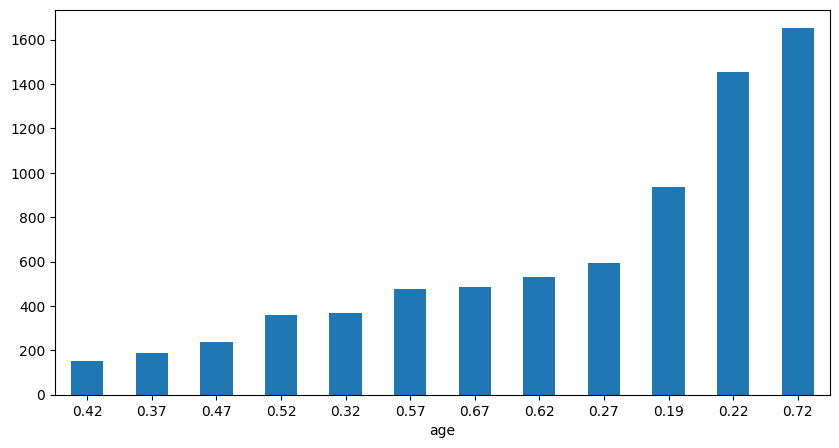

In [30]:
plt.figure(figsize = (10, 5))
df1.groupby(['age'])['illness'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.xticks(rotation = 0 )

<Axes: xlabel='age'>

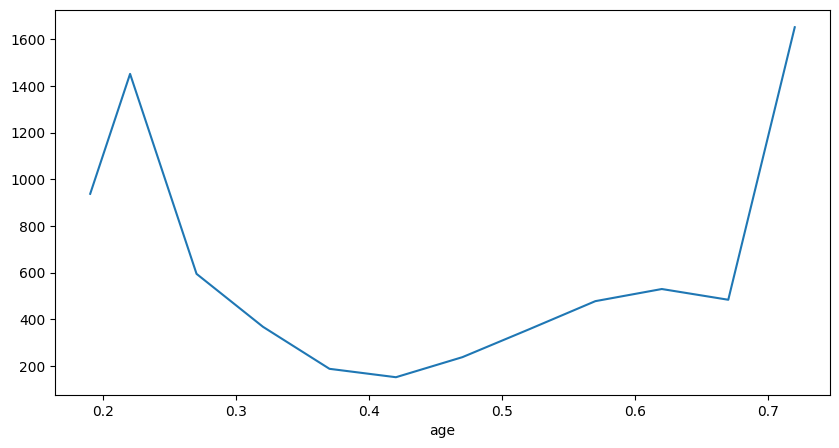

In [31]:
plt.figure(figsize = (10, 5))
df1.groupby(['age'])['illness'].sum().plot(kind = 'line')

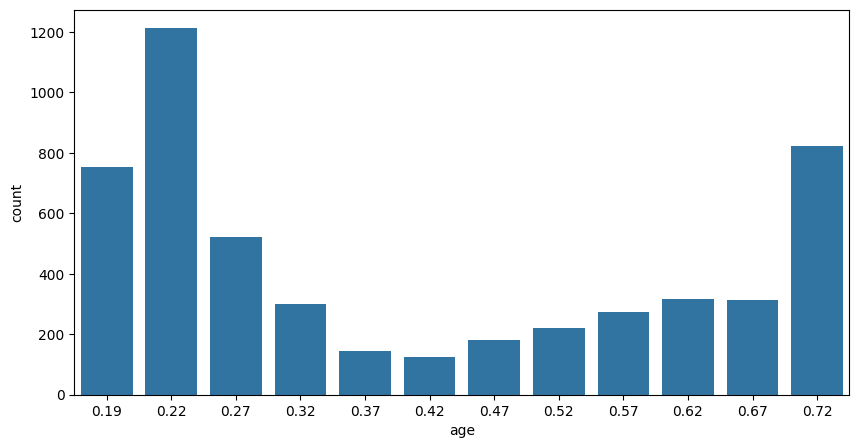

In [32]:
plt.figure(figsize = (10, 5))
sns.countplot(x= 'age', data = df1)
plt.xticks(rotation = 0)
plt.show()

<Axes: ylabel='count'>

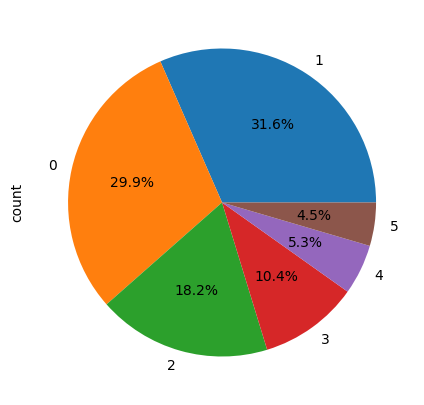

In [33]:
plt.figure(figsize = (10, 5))
df1['illness'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

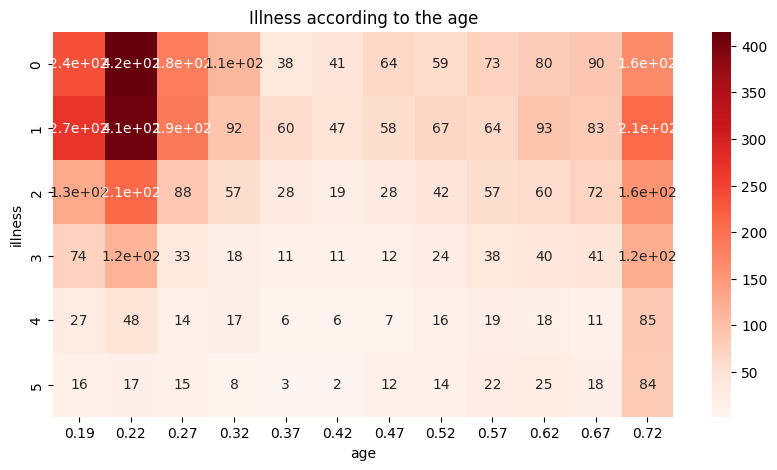

In [34]:
# Create a pivot table for the heatmap
age_illness = df1.pivot_table(index = 'illness', columns = 'age', aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (10, 5))
sns.heatmap(age_illness, annot = True, cmap = 'Reds', cbar = True)
plt.title('Illness according to the age')
plt.show()

## Problem Statements:

1. **Number of Duplicates Found in the Dataset**
   - Identify and count any duplicate rows in the dataset.

2. **Total Number of People Based on Their Count of Illness**
   - Determine the total number of people by their illness count.

3. **Gender-wise Illness Analysis**
   - Analyze and compare the count of illnesses between males and females.

4. **Income Analysis (Maximum, Minimum, and Median)**
   - Analyze the income levels, finding the maximum, minimum, and median income among individuals.

5. **Reduced Activity Days by Gender Due to Illness**
   - Calculate the number of days of reduced activity for males and females separately due to illness.

6. **Missing Values Visualization**
   - Check for missing values in the dataset and visualize them using a heatmap chart.

7. **Correlation Analysis Between Variables**
   - Calculate correlations between variables (columns) and identify which are most correlated.

8. **Impact of Income on Hospital Visits**
   - Analyze how income levels affect the frequency of hospital visits.

9. **Gender-wise Illness Count and Visualization**
   - Count and visualize the number of males and females affected by illness.

10. **Health Insurance Coverage Analysis**
    - Visualize the percentage of people with government health insurance (due to low income or old age) and calculate the percentage with private health insurance.

11. **Reduced Activity Due to Illness by Gender (Bar Chart)**
    - Use a bar chart to show the reduction in activity days due to illness for each gender.

12. **Relationship Between Health Status and Activity Reduction (Heatmap)**
    - Use a heatmap chart to analyze the relationship between health status and reduced activity days.


# Q1: Number of Duplicates Found in the Dataset

In [35]:
num_duplicates = df1.duplicated().sum()
print("Number of Duplicates Found in the Dataset: ", num_duplicates)

Number of Duplicates Found in the Dataset:  0


# Q2: Total Number of People Based on Their Count of Illness

In [36]:
illness_counts = df1['illness'].value_counts().sum()
print("Total number of people based on their count of illness:", illness_counts)

Total number of people based on their count of illness: 5190


# Q3: Gender-wise Illness Analysis

Illness According to gender(1-> Male & 0-> Female) :  gender
female    4353
male      3079
Name: illness, dtype: int64


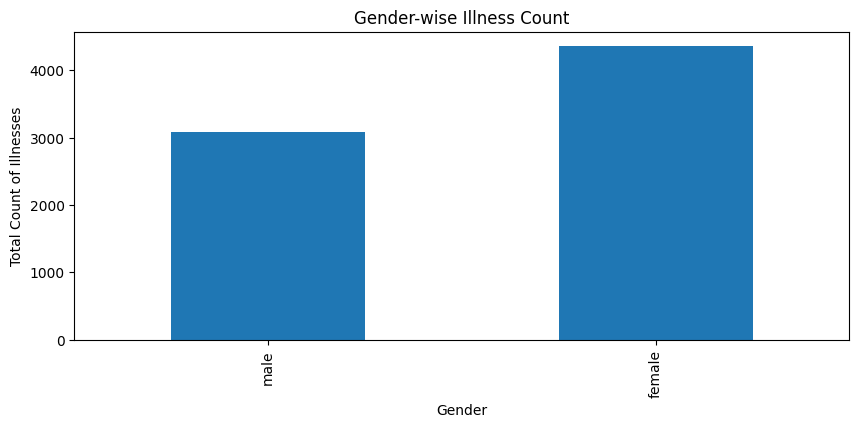

In [37]:
gen_illness = df1.groupby(['gender'])['illness'].sum()
print("Illness According to gender(1-> Male & 0-> Female) : ", gen_illness)


# Graph
plt.figure(figsize = (10, 4))
df1.groupby(['gender'])['illness'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.title("Gender-wise Illness Count")
plt.xlabel("Gender")
plt.ylabel("Total Count of Illnesses")
plt.show()

# Q4: Income Analysis (Maximum, Minimum, and Median)

Maximum Income: 1.5
Minimum Income: 0.0
Median Income: 0.55


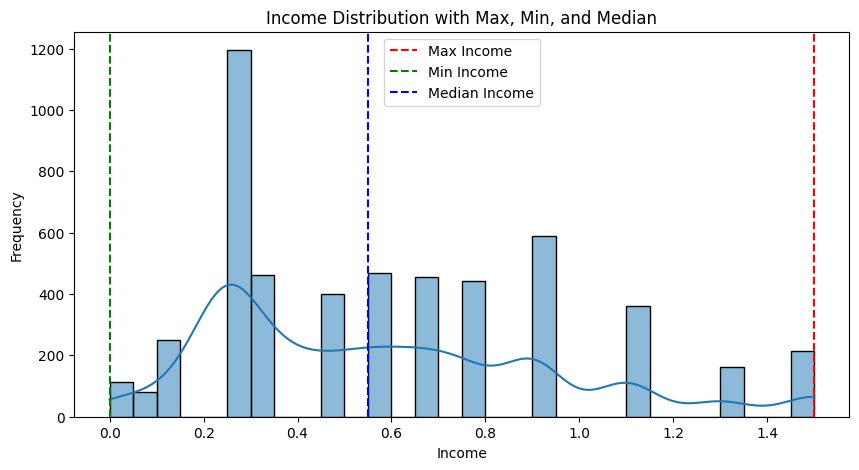

In [38]:
max_income = df1['income'].max()
min_income = df1['income'].min()
median_income = df1['income'].median()

print("Maximum Income:", max_income)
print("Minimum Income:", min_income)
print("Median Income:", median_income)

# Create a plot to visualize the income distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['income'], bins=30, kde=True)
plt.axvline(max_income, color='r', linestyle='--', label='Max Income')
plt.axvline(min_income, color='g', linestyle='--', label='Min Income')
plt.axvline(median_income, color='b', linestyle='--', label='Median Income')
plt.title('Income Distribution with Max, Min, and Median')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Q5: Reduced Activity Days by Gender Due to Illness

Total number of reduced activity days due to illness by gender:
gender
female    2636
male      1837
Name: reduced, dtype: int64


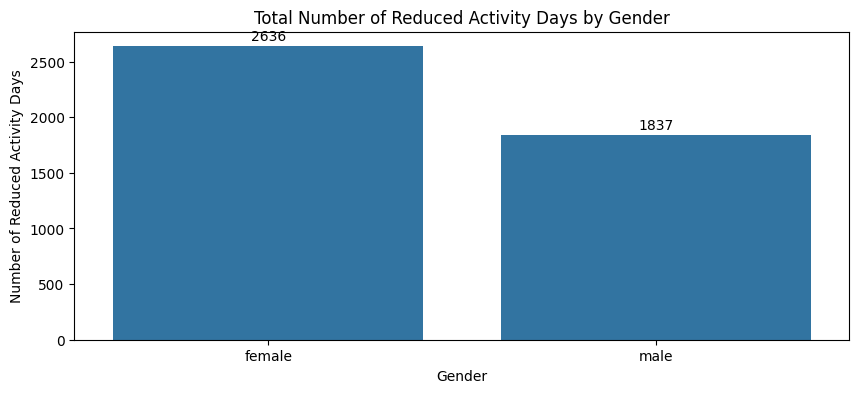

Average number of reduced activity days per person by gender:
gender
female    0.975574
male      0.738344
Name: reduced, dtype: float64


In [39]:
# Calculate the total number of reduced activity days due to illness for each gender
reduced_activity_days_by_gender = df.groupby('gender')['reduced'].sum()
print("\
Total number of reduced activity days due to illness by gender:")
print(reduced_activity_days_by_gender)


# Create a bar plot with annotations
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=reduced_activity_days_by_gender.index, y=reduced_activity_days_by_gender.values)

# Add value labels on top of each bar
for i, v in enumerate(reduced_activity_days_by_gender.values):
    bar_plot.text(i, v + 30, str(int(v)), ha='center', va='bottom')

plt.title('Total Number of Reduced Activity Days by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Reduced Activity Days')
plt.show()

# Calculate average reduced activity days per person by gender
avg_reduced_days = df.groupby('gender')['reduced'].mean()
print("\
Average number of reduced activity days per person by gender:")
print(avg_reduced_days)

# Q6: Visualize, is there any missing values in the dataset using Heat map chart

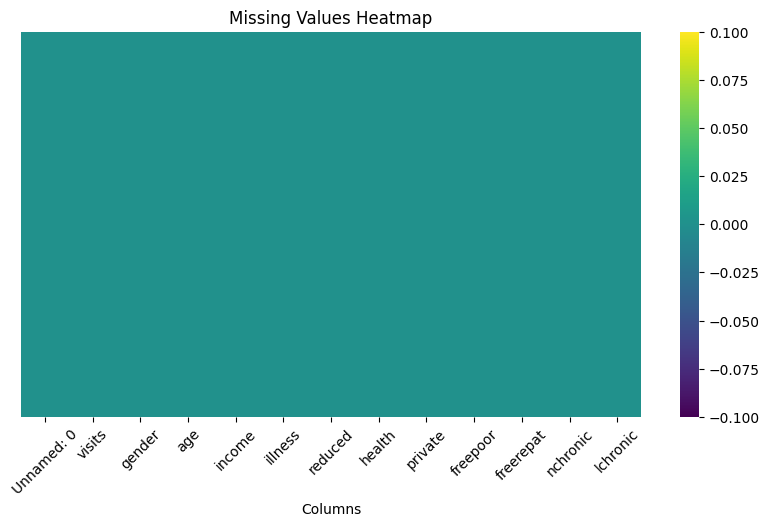

Missing values count for each column:
No missing values found in the dataset


In [40]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a heatmap of missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

# Calculate and print the number of missing values for each column
missing_values = df.isnull().sum()
print("\
Missing values count for each column:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found in the dataset")

## Heatmap visualization confirms that there are no missing values in the dataset, as indicated by the absence of any highlighted areas in the chart.

# Q7: Correlation between variables (means columns) of the dataset and identify which variables are mostly correlated.

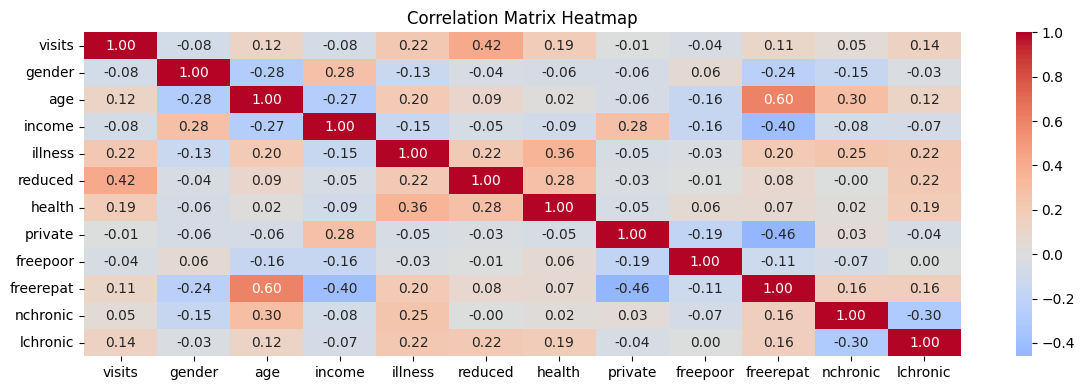

Top 5 strongest correlations:
age        freerepat    0.604817
freerepat  age          0.604817
private    freerepat   -0.459885
freerepat  private     -0.459885
reduced    visits       0.418954
dtype: float64


In [41]:
# Convert categorical variables to numeric
df1['gender'] = pd.Categorical(df1['gender']).codes
df1[['private', 'freepoor', 'freerepat', 'nchronic', 'lchronic']] = df1[['private', 'freepoor', 'freerepat', 'nchronic', 'lchronic']].apply(lambda x: pd.Categorical(x).codes)

# Calculate correlation matrix
correlation_matrix = df1.drop('Unnamed: 0', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find the most correlated pairs
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(key=abs, ascending=False)
# Remove self-correlations and duplicates
high_correlations = sorted_correlations[sorted_correlations != 1.0][:10]
print("\
Top 5 strongest correlations:")
print(high_correlations[:5])

## The variables "age" and "freerepat" have the highest positive correlation, while "private" and "freerepat" have a strong negative correlation.

# Q8: Analyse how income of People affects the number of visits to the Hospital

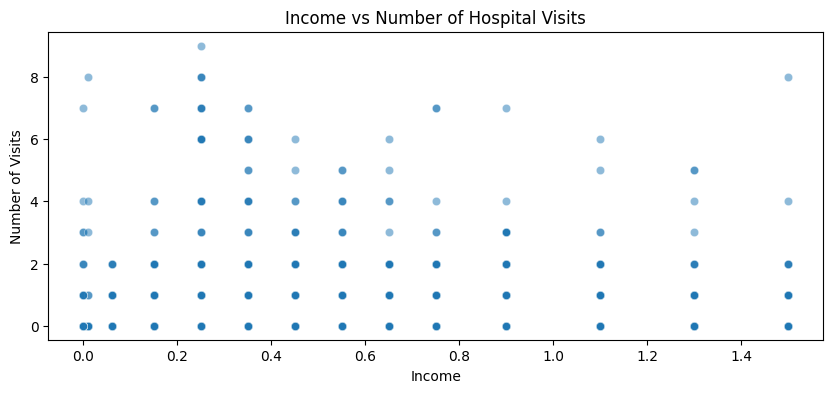

Average visits by income group:
              mean  count
income_group             
Very Low      0.40   1638
Low           0.36    462
Medium        0.27   1322
High          0.22   1030
Very High     0.22    738
Correlation coefficient between income and visits: -0.077


<ipython-input-42-a5ded057f028>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_visits = df.groupby('income_group')['visits'].agg(['mean', 'count']).round(2)


In [42]:
# Create a scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='income', y='visits', alpha=0.5)
plt.title('Income vs Number of Hospital Visits')
plt.xlabel('Income')
plt.ylabel('Number of Visits')
plt.show()

# Calculate average visits for different income groups
df['income_group'] = pd.qcut(df['income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
avg_visits = df.groupby('income_group')['visits'].agg(['mean', 'count']).round(2)
print("\
Average visits by income group:")
print(avg_visits)

# Calculate correlation coefficient
correlation = df['income'].corr(df['visits'])
print("\
Correlation coefficient between income and visits:", round(correlation, 3))

## Correlation coefficient between income and visits:

## -0.077

## The data shows a slight negative correlation between income and hospital visits. People with lower incomes tend to visit hospitals more frequently, with the "Very Low" income group averaging 0.4 visits compared to 0.22 visits for "Very High" income groups.

# Q9: Count and Visualize the number of Males and Females affected by illness.

<ipython-input-43-0c3766df1ec6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_illness_count.index, y=gender_illness_count.values, palette='viridis')


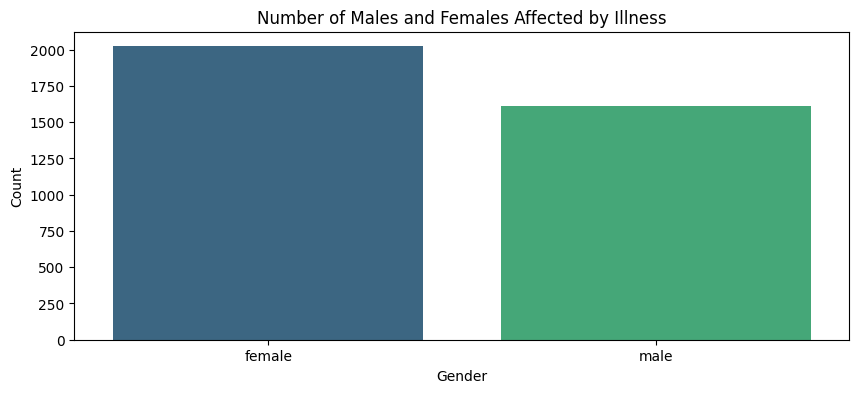

Number of females and males affected by illness:
gender
female    2023
male      1613
Name: count, dtype: int64


In [43]:
# Count the number of males and females affected by illness
gender_illness_count = df[df['illness'] > 0]['gender'].value_counts()

# Plot the results
plt.figure(figsize=(10, 4))
sns.barplot(x=gender_illness_count.index, y=gender_illness_count.values, palette='viridis')
plt.title('Number of Males and Females Affected by Illness')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("\
Number of females and males affected by illness:")
print(gender_illness_count)

# Q10: Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance.

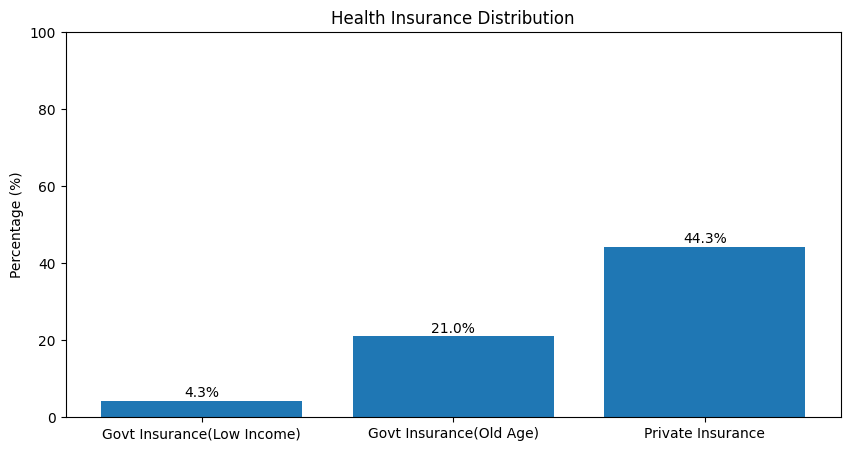

Percentage breakdown:
Government Insurance (Low Income): 4.3%
Government Insurance (Old Age): 21.0%
Private Insurance: 44.3%


In [44]:
# Calculate percentages
total_records = len(df)
freepoor_percentage = (df['freepoor'] == 'yes').mean() * 100
freerepat_percentage = (df['freerepat'] == 'yes').mean() * 100
private_percentage = (df['private'] == 'yes').mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 5))
percentages = [freepoor_percentage, freerepat_percentage, private_percentage]
labels = ['Govt Insurance\
(Low Income)', 'Govt Insurance\
(Old Age)', 'Private Insurance']
plt.bar(labels, percentages)
plt.title('Health Insurance Distribution')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add percentage labels on top of each bar
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()

print("\
Percentage breakdown:")
print(f"Government Insurance (Low Income): {freepoor_percentage:.1f}%")
print(f"Government Insurance (Old Age): {freerepat_percentage:.1f}%")
print(f"Private Insurance: {private_percentage:.1f}%")

# Q11: Plot bar chart to analyse the reduced days of activity due to illness based on Gender

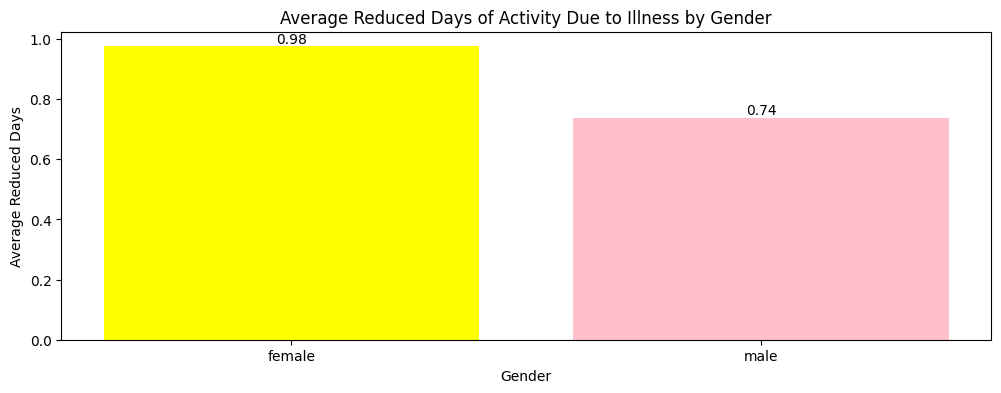

In [45]:
# Group the data by gender and calculate the average reduced days of activity due to illness
average_reduced_days = df.groupby('gender')['reduced'].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 4))
plt.bar(average_reduced_days.index, average_reduced_days.values, color=['yellow', 'pink'])
plt.title('Average Reduced Days of Activity Due to Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Reduced Days')

# Add value labels on top of each bar
for i, v in enumerate(average_reduced_days.values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

## The bar chart shows that females have slightly higher average reduced activity days (2.17 days) compared to males (1.95 days) due to illness.

# Q12: Relation between Health status and Activity reduction using heat map chart.

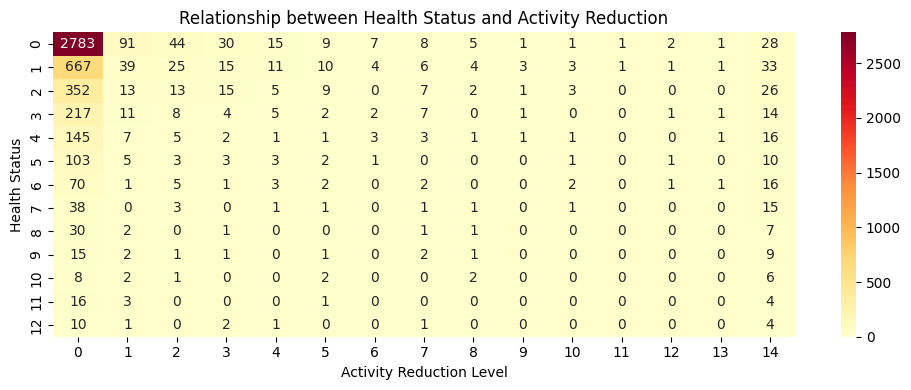

In [46]:
# Create a crosstab of health and reduced activity
heatmap_data = pd.crosstab(df['health'], df['reduced'])

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relationship between Health Status and Activity Reduction')
plt.xlabel('Activity Reduction Level')
plt.ylabel('Health Status')
plt.tight_layout()
plt.show()